# Analyse socio-demographic Variables (Questionaire)

To find interessting social groups with regard to the distribution of the SCHUFA-score, we needed to describe those features and see if the proportions are approximatly the same as in the population of germany.

Furthermore we described the proportions between those groups and more importantly looked at the distributions of financial data that might have discriminative power for a credit worthiness score.  
We also compared one of those distributions, namely the monthlyIncome, with the population of germany using empirical results from the social structure analysis as well as social inequality studies to get an idea of the skewiness of our dataset and to make assumptions about groups that might have unequal distributions of scores.

Goal of this section is to find social groups that have disparate distributions in some finance-resource indicating feature in an explorative fashion and are somewhat frequently distributed for further inferential analysis.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

import analysis_helpers as hstats

We specify the import and export paths and define helper functions for plotting and descriptive statistics.

In [6]:
data_path = "/media/veracrypt1/"
plot_path = "plots/"

In [7]:
# Color function for tables
def _color_map(c):
    c = abs(c)
    if c >= 0.1 and c < 0.3:
        color = "background-color: yellow"
    elif c >= 0.3 and c < 0.5:
        color = "background-color: orange"
    elif c >= 0.5:
        color = "background-color: red"
    else:
        color = ""
    return color

In [8]:
def show_frequencies(col, name, chars, attr=None):
    n = quest.shape[0]
    
    ax = quest[col].value_counts().reindex(chars).plot("bar", figsize=(10,8))
    ax.set_xlabel(name)
    ax.set_ylabel("absolute frequency")
    ax.set_title("distribution: %s"%name)
    if attr is not None:
        ax.set_xticklabels(attr)
    
    print("relative frequency of: %s"%name)
    print(quest[col].value_counts()/n)
    
    return ax

In [9]:
def rel_freq_compare_old(col, chars, values, title, name1, name2):
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,10))
    quest[col].value_counts().div(quest[col].value_counts().sum()).reindex(chars).plot("bar", figsize=(10,8), ax=ax[0])
    ax[1].bar(chars, values)
    fig.suptitle(title)
    ax[0].set_xlabel(name1)
    ax[0].set_ylabel("relative frequency")
    ax[1].set_xlabel(name2)
    ax[1].set_ylabel("relative frequency")
    
def rel_freq_compare(col, chars, values, title, name, attr=None):
    tmp = quest[col].value_counts().div(quest[col].value_counts().sum()).reindex(chars).values
    tmp = pd.DataFrame(np.array([tmp, values]).T, columns=["data set", "population"], index=chars)
    ax = tmp.plot(kind="bar", figsize=(10,8))
    ax.set_xlabel(name)
    ax.set_ylabel("relative frequency")
    ax.set_title(title)
    if attr is not None:
        ax.set_xticklabels(attr)

## General properties of the questionaire

In [10]:
# Load the Questionaire-Dataset
#quest = pd.read_csv(data_path + "SPON_dataset_tables/static_questionaire_final.csv", sep=";")
df_ds = pd.read_csv(data_path + "SPON_dataset_tables/datasets_v2/20190703_dataset.csv", sep=";", low_memory=False)

In [11]:
# Get only first occurence of a case to analyse questionaire-data ignoring the domain etc. of the schufa-score
quest = df_ds[~(df_ds.id.duplicated())]

In [12]:
print("Dimensions (rows, columns):", quest.shape)

Dimensions (rows, columns): (2597, 48)


In [13]:
print("Feature-Names: ", quest.columns[1:].values)

Feature-Names:  ['date' 'table' 'customer' 'feature' 'domain' 'version' 'score' 'value'
 'level' 'meaning' 'stoerung' 'kredit_jahr' 'kredit_nutzung'
 'kredit_historie' 'allgemein' 'anschrift' 'all_columns_text'
 'activeLoanAmount' 'admonition' 'cashing' 'employment'
 'executionProceedings' 'familyStatus' 'housing' 'insolvencyProceedings'
 'mailOrder' 'migrationBackground' 'monthlyIncome' 'numberOfActiveLoans'
 'numberOfChildren' 'numberOfCreditCards' 'numberOfGiroAccounts'
 'numberOfMobileContracts' 'numberOfPaidOffLoans' 'paidOffLoanAmount'
 'plz' 'relocation' 'schufaDate' 'sex' 'yearOfBirth' 'foreigner'
 'basisscore' 'plz_one' 'east_west' 'age' 'age_class' 'age_gen']


We have social-demograopraphic variables: 
- employment (categorical)
- familyStatus (categorical)
- numberOfChildren (metric, proportional-scaled)
- housing (categorical)
- migrationBackground (dichotomous)
- foreigner (dichotomous)
- sex (categorical)
- age (metric, proportional-scaled)
- generation_groups, age_class (ordinal)
- plz (different aggregations: plz_one, plz_two) (categorical)

There are also economic variables as well as hypothetically SCHUFA-related variables: 
- monthlyIncome (ordinal)
- activeLoan (ordinal)
- paidOffLoan (ordinal)
- negative Features
    - insolvencyProceedings (dichotomous)
    - executionProceedings (dichotomous)
    - admonition (dichotomous)
    - cashing (dichotomous)
- mailOrder (dichotomous)
- numberOfCreditCards (metric, proportional-scaled)
- numberOfGiroAccounts (metric, proportional-scaled)
- numberOfMobileContracts (metric, proportional-scaled)
- relocation (metric, proportional-scaled)

## Socio-demographic Dimensions in the dataset

In [14]:
sex_chars = ["male", "female", "non-binary"]
sex_attr = ["male", "female", "non-binary"]

migrationBackground_chars = [False, True]
migrationBackground_attr = ["without", "with"]

foreigner_chars = [False, True]
foreigner_attr = ["personen with ger. passport", "personen without ger. passport"]

east_west_attr = ["west", "east"]
east_west_chars = ["west", "east"]

employment_attr = ["employed", "student", "freelance", "official", "retired", "seeking-work"]
employment_chars = ["employed", "student", "freelance", "official", "retired", "seeking-work"]

familyStatus_attr = ["single", "married", "divorced"]
familyStatus_chars = ["single", "married", "divorced"]

age_class_chars = ["<15", "15-24", "25-29", "30-39", "40-49", "50-64", ">=65"]
age_gen_chars = [1, 2, 3, 4]

### Sex

relative frequency of: sex
male          0.864459
female        0.108202
non-binary    0.001540
Name: sex, dtype: float64


/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


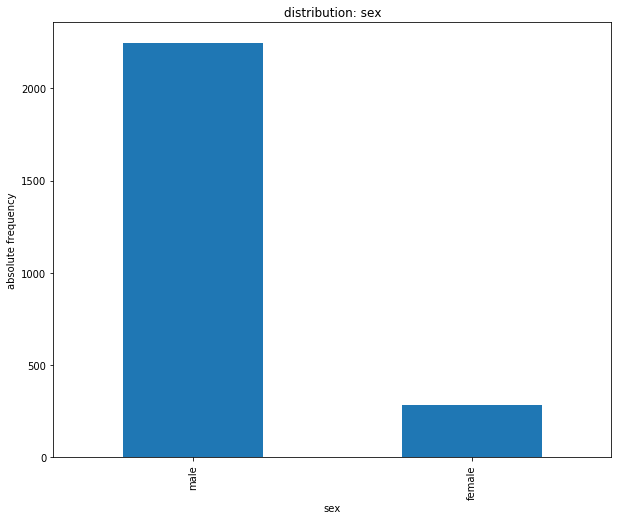

In [17]:
ax = show_frequencies("sex", "sex", sex_chars, sex_attr)

The category "non-binary" is obviously not frequent enough to reason about a population. We need to ignore it.

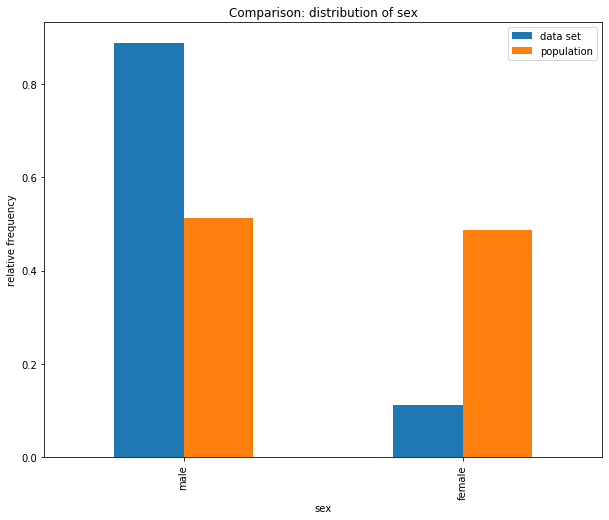

In [19]:
#sex_chars.remove("non-binary")
#sex_attr.remove("non-binary")

rel_freq_compare("sex", sex_chars, [0.512, 0.488], "Comparison: distribution of sex", "sex", sex_attr)

As we can see by comparing the frequencies with the population, females are highly underrepresented.

### Migration Background

relative frequency of: migrationBackground
False    0.946477
True     0.053523
Name: migrationBackground, dtype: float64


/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


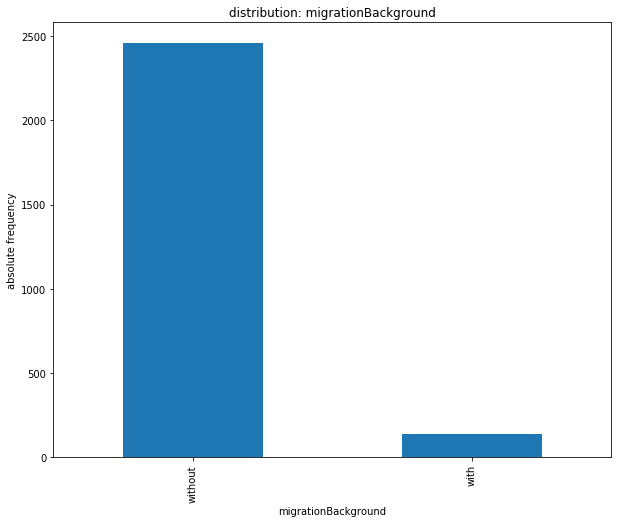

In [21]:
show_frequencies("migrationBackground", "migrationBackground", migrationBackground_chars, migrationBackground_attr)

There are too few observations of persons with a migration Background to reason about the population.

### Foreigner

relative frequency of: foreigner
False    0.897189
True     0.018868
Name: foreigner, dtype: float64


/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


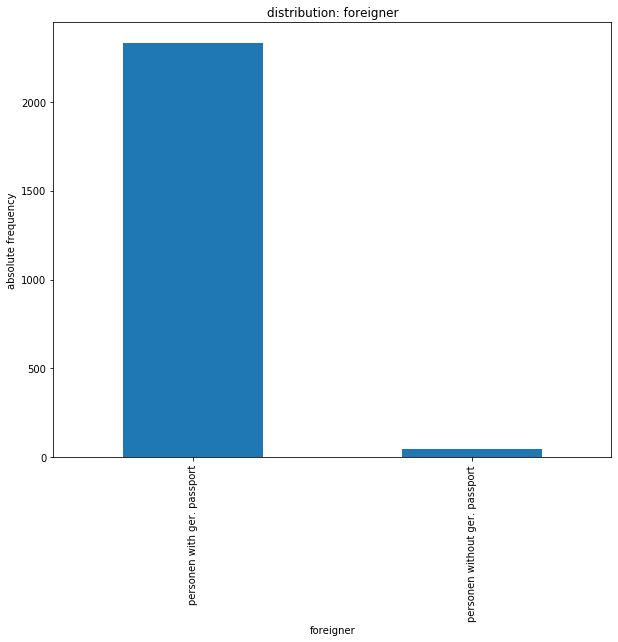

In [22]:
show_frequencies("foreigner", "foreigner", foreigner_chars, foreigner_attr)

There are too few observations of persons with a migration Background to reason about the population.

### Generation Groups

relative frequency of: generation
2.0    0.530227
3.0    0.291875
4.0    0.159800
1.0    0.001540
Name: age_gen, dtype: float64


/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


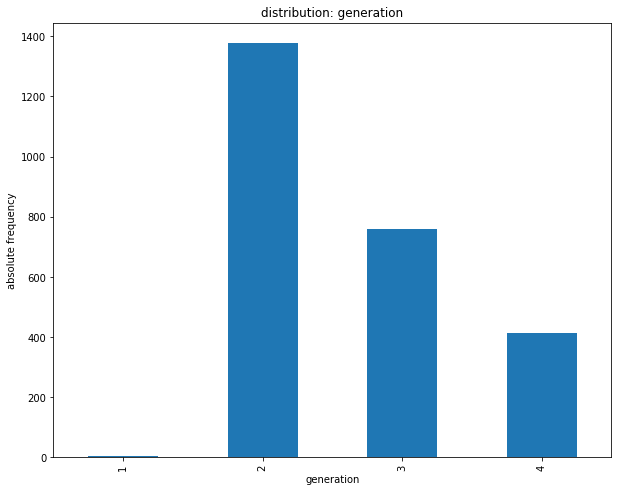

In [23]:
show_frequencies("age_gen", "generation", age_gen_chars)

Generation Age-Ranges: 0-17 (0.03%), 18-34 (48%), 35-50 (33%), 50+ (18%)<br>
There are very few persons in the age from 1-17. We also have a underrepresentation of old people.

In [17]:
# classes of age according to zensus 2011, bpb

"""def get_ageclass(row):
    if np.isnan(row):
        return row
    elif row < 15:
        return "<15"
    elif row >= 15 and row < 25:
        return "15-24"
    elif row >= 25 and row < 30:
        return "25-29"
    elif row >= 30 and row < 40:
        return "30-39"
    elif row >= 40 and row < 50:
        return "40-49"
    elif row >= 50 and row < 65:
        return "50-64"
    else:
        return ">=65"
    
quest["age_class"] = quest["age"].apply(get_ageclass)""";

relative frequency of: age classes
30-39    0.341548
25-29    0.193685
40-49    0.154794
50-64    0.135541
15-24    0.133231
>=65     0.024259
<15      0.000385
Name: age_class, dtype: float64


/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


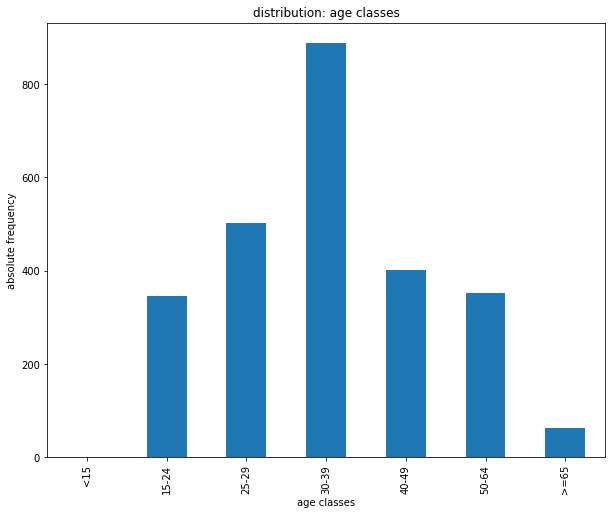

In [24]:
show_frequencies("age_class", "age classes", age_class_chars)

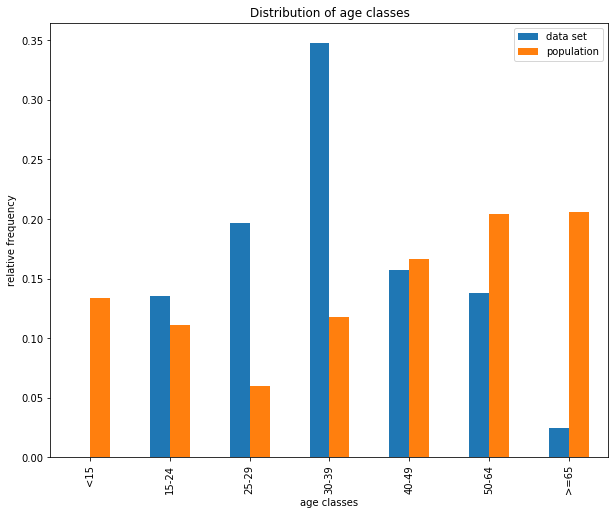

In [25]:
rel_freq_compare("age_class", age_class_chars, 
                 [0.05+0.084, 0.111, 0.06, 0.118, 0.166, 0.204, 0.113+0.093], "Distribution of age classes", "age classes")

The comparison with the population proportions of age classes shows a over representation of persons between 30-39 as well as Underrepresentation of young and old people.

### Family Status

relative frequency of: family status
single           0.454755
married          0.360801
divorced         0.029265
single-parent    0.004621
Name: familyStatus, dtype: float64


/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


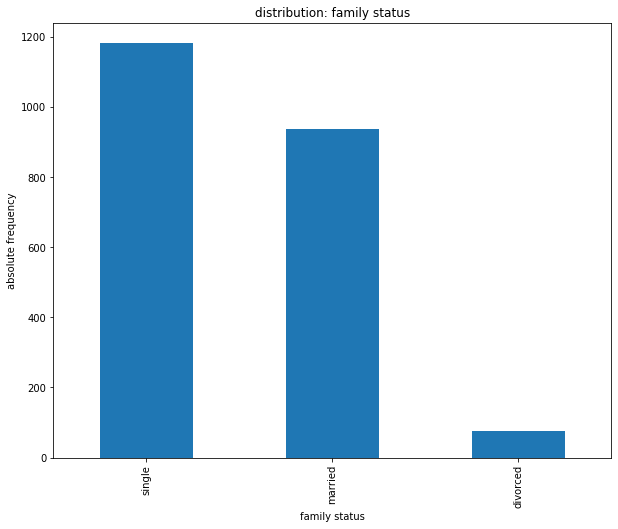

In [26]:
show_frequencies("familyStatus", "family status", familyStatus_chars)

We have only very few single-prarents in the dataset and have to ignore this category. 

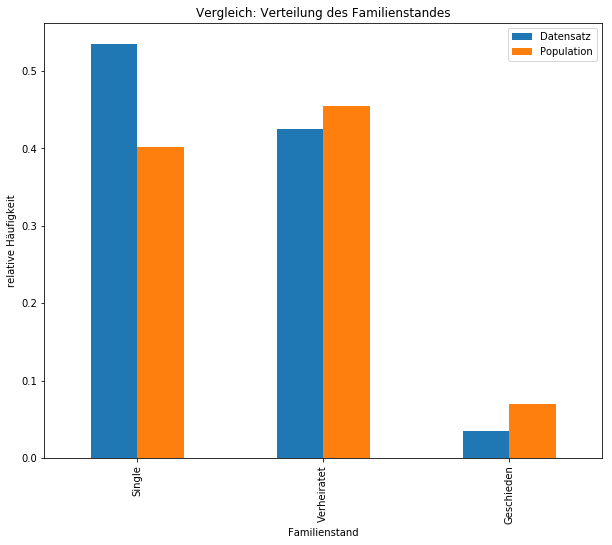

In [21]:
rel_freq_compare("familyStatus", familyStatus_chars, 
                 [0.402, 0.455, 0.07], "Vergleich: Verteilung des Familienstandes", "Familienstand", familyStatus_attr)

The distributions seem quite similar. We ignored single-parents (in dataset) as well as widowed persons (in statistic).

### Employment

relative frequency of: Beschäftigung
employed        0.550635
student         0.155564
freelance       0.100501
official        0.040046
retired         0.033885
seeking-work    0.020408
Name: employment, dtype: float64


/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


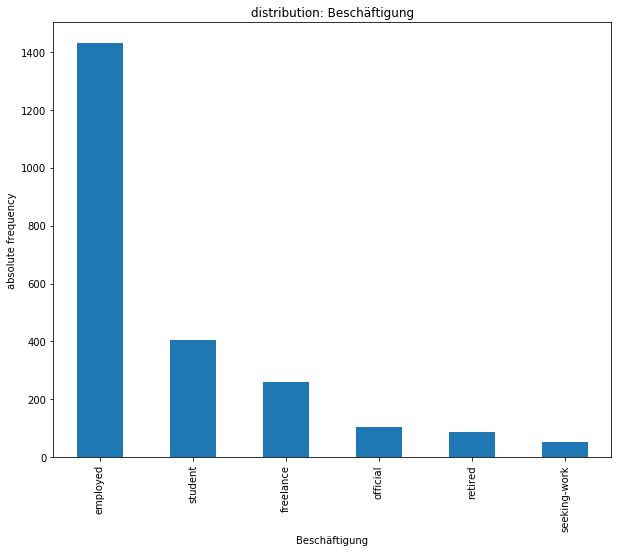

In [27]:
show_frequencies("employment", "Beschäftigung", employment_chars, employment_attr)

We have very few work-seeking and retired people those are most likely underrepresented.

In [28]:
#employed/freelance/official(50.2%), seeking-work(2.7%), student/retired/children/..(47.1%)

def aggr_empl(row):
    if str(row) == "nan":
        return row
    if row == "employed" or row == "freelance" or row == "official":
        return "working"
    if row == "student" or row == "retired":
        return "other"
    else:
        return row
    
empl_tmp = quest.employment.apply(aggr_empl)

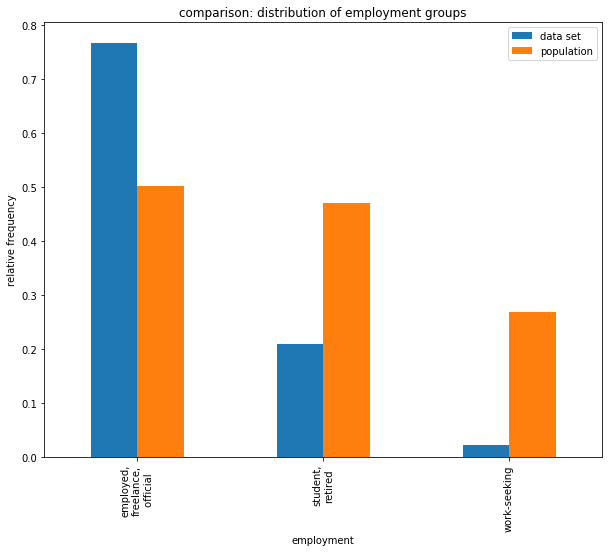

In [32]:
chars = ["working", "other", "seeking-work"]
name = "employment"
title = "comparison: distribution of employment groups"
values = [0.502, 0.471, 0.27]
attr = ["employed,\nfreelance,\n official", "student,\nretired", "work-seeking"]

tmp = empl_tmp.value_counts().div(empl_tmp.value_counts().sum()).reindex(chars).values
tmp = pd.DataFrame(np.array([tmp, values]).T, columns=["data set", "population"], index=chars)
ax = tmp.plot(kind="bar", figsize=(10,8))
ax.set_xlabel(name)
ax.set_ylabel("relative frequency")
ax.set_title(title)
if attr is not None:
    ax.set_xticklabels(attr)

### Employment (only employees, officials, freelancer)

Relative frequencies of only working persons:
employed     0.796657
freelance    0.145404
official     0.057939
Name: employment, dtype: float64


/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


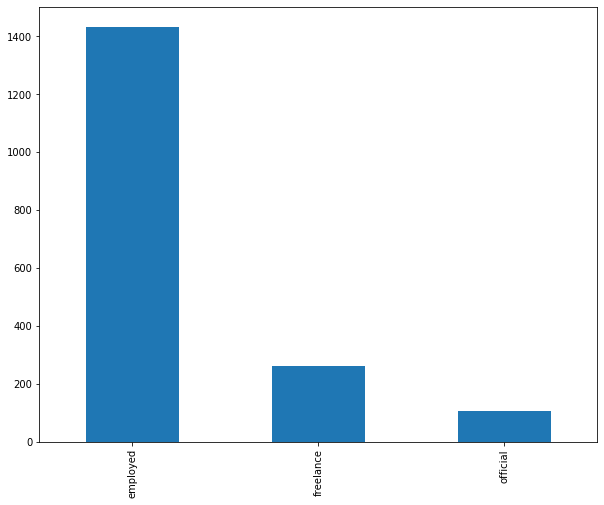

In [33]:
only_empl = np.any([quest["employment"]=="employed", quest["employment"]=="freelance", quest["employment"]=="official"], axis=0)

n = quest[only_empl].shape[0]
quest[only_empl]["employment"].value_counts().plot("bar", figsize=(10,8))

print("Relative frequencies of only working persons:")
print(quest[only_empl]["employment"].value_counts()/n)

The proportions of working people seem to have overrepresented underrepresented officials.

### Zip-Codes

relative frequency of: Postleitzahl
1.0    0.151328
8.0    0.116673
7.0    0.112822
5.0    0.112437
2.0    0.112052
4.0    0.084713
6.0    0.083173
3.0    0.077782
9.0    0.068926
0.0    0.057759
Name: plz_one, dtype: float64


/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


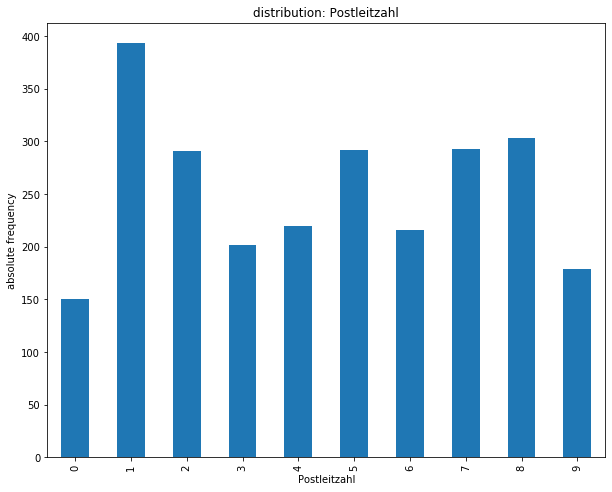

In [34]:
show_frequencies("plz_one", "Postleitzahl", list(range(10)))

In [35]:
quest.plz_one.unique()

array([ 8.,  1., nan,  2.,  3.,  7.,  0.,  4.,  9.,  5.,  6.])

In [36]:
# Load germany map in zip-code areas
shp_path = "../../04Daten/plz_map_data/plz-1stellig.shp/plz-1stellig.shp"
federal_map = gpd.read_file(shp_path)
federal_map.plz = federal_map.plz.astype('float64')

# Load dimension data
federal_data = quest[["plz_one", "monthlyIncome", "employment", "east_west", "age_gen"]]

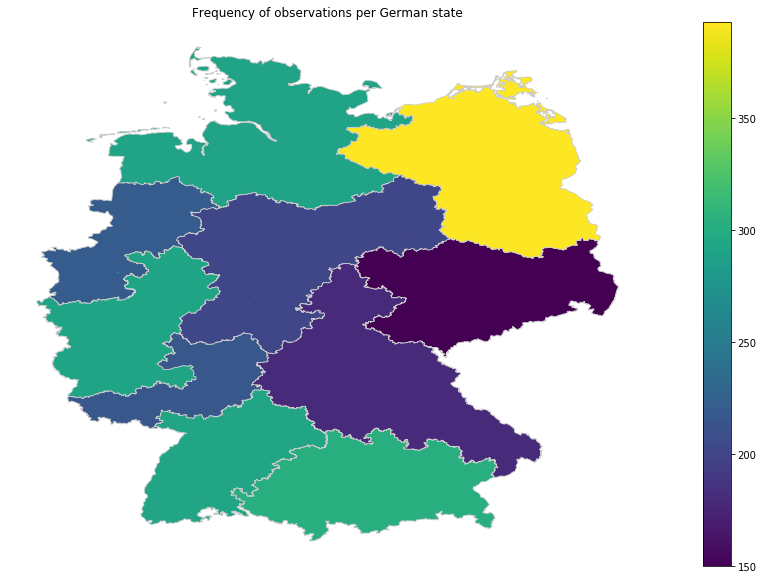

In [38]:
# COUNT PLZ
federal_count = federal_data[~(federal_data["plz_one"].isna())]["plz_one"].value_counts()

# join map and data
federal_map = federal_map.join(federal_count, on="plz", rsuffix="_count")

# Visualize map
fig, ax = plt.subplots(1, figsize=(20,10))

federal_map.plot(column="plz_one", cmap="viridis", linewidth=.8, ax=ax, edgecolor="0.8")

# Styling
ax.axis("off")
ax.set_title("Frequency of observations per German state")
# Add colorbar
vmin, vmax = federal_count.min(), federal_count.max()
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = [] # empty array for data range
cbar = fig.colorbar(sm)

We can see that the zip code beginning with 1 (most of all Berlin) is overrepresented.

### East - West

relative frequency of: historical east & west Germany
west    0.768579
east    0.209087
Name: east_west, dtype: float64


/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


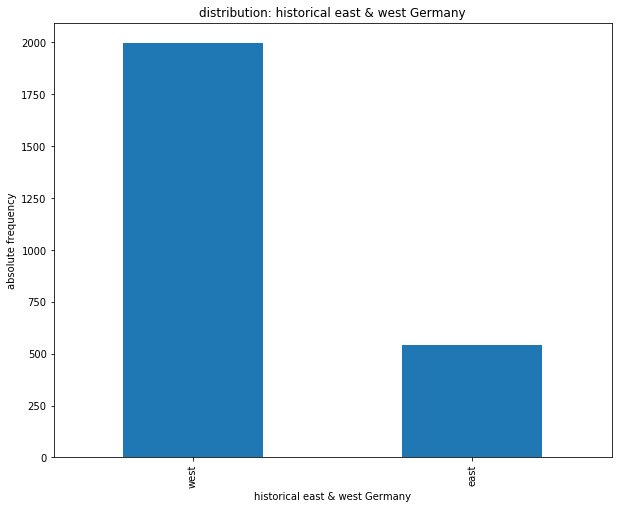

In [39]:
show_frequencies("east_west", "historical east & west Germany", ["west", "east"], east_west_attr)

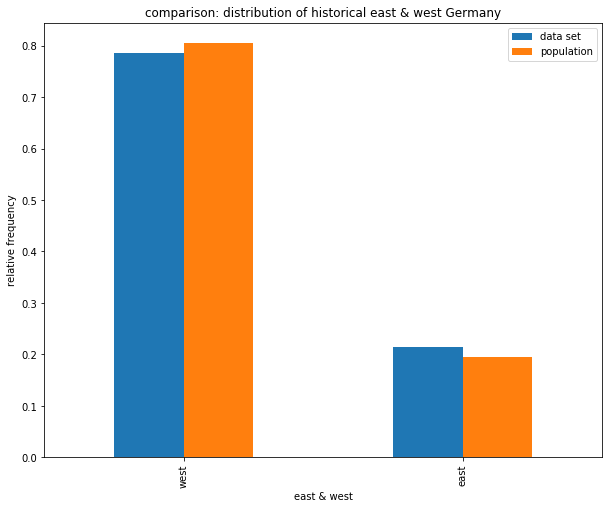

In [41]:
rel_freq_compare("east_west", east_west_chars, [0.8045, 0.1955], "comparison: distribution of historical east & west Germany", "east & west", east_west_attr)

The proportional comparison shows quite similar distributions. But we need to be aware of wrong representations in the subregions of west and east germany. For example: Berlin is likely to be overrepresented in East-Germany.

## Comparison of socio-demographic variables to population proportions 

Dimensions and its characteristics we might be able to use:
- sex: male(87%), female(11%)
- migrationBackground: False (95%), True (5%)
- foreigner: False (90%), True (2%)
- generation(age): 0-17 (0.03%), 18-34 (48%), 35-50 (33%), 50+ (18%)
- age groups: 0-14 (0%), 15-24 (9%), 25-64 (87%), 65+ (3%)
- familyStatus: single (46%), married (42%), divorced (3%), single-parent (0.4%)
- employment: employed (55%), student (16%), freelance (10%), official (4%), retired (3.5%), seeking-work (2%)
- east_west: west (77%), east (21%)

The Population of germany has the following proportions (based on Zensus 2011):
- sex: male(48.8%), female(51.5%)
- migrationBackground: False (81.1%), True(18.9%) / bpb,2017: False(76.4%), True(23.6%)
- foreigner: False(92.3%), True(7.7%) / bpb,2017: False(88.5), True(11.5)
- age class: <15(13.4%), 15-24(11.1%), 25-29(6%), 30-39(11.8%), 40-49(16.6%), 50-64(20.4%), >=65(20.6%)
- familyStatus: single(40.2%), married(45.5%), divorced(7.9%), widowed(7.3%)
- employment: employed/freelance/official(50.2%), seeking-work(2.7%), student/retired/children/..(47.1%)
    - employed(83%), freelance(11%), official(5%)
- east_west: pdwb.de/nd06.htm, 2017: west(80.45%), east(19.55%)

As we have already seen, the following dimensions are too strongly skewed:
- migrationBackground
- foreigner

To get a sample with a size that is big enough for interpreting and analysing their characteristics we also should remove samples that are too few of a characteristic of a dimension we want to look at.
- sex: non-binary
- age: maybe we should start at an age of 18 and just look at not-retired people (removing also age higher 65)
- familyStatus: we might remove divorced and single-parent or simply ignore this dimension
- employment: We might remove participants that do not work (retired, seeking-work)
- east_west: We can leave that as it is

## Social structure in dataset with focus on financial resources

According to sociology and the subfield of social inequality empirical studies, there are some main dimensions along which financial disparities (income, wealth) are disparatly distributed. We proxy those disparities with features like monthlyIncome and Loan-features.  
The disparities occure along:
- employment: Order - Selbstständige, Pensionäre, Beamte, Angestellte, Arbeiter, Rentner, Landwirte, Arbeitslose, Sozialhilfeempfänger
- family status: Order - Ehepaare ohne Kind, alleinlebende Männer, Paare mit 1 Kind, Paare mit mind. 2 Kindern, Alleinlebende Frauen, Alleinerziehende
- east-west: Order - West, Ost
- sex: Order - Male, Female
- age
- migration background

As we have seen, there are too few observations of migration background, so we unfortunatly have to ignore this variable.

We now want to analyse the monthlyIncome along the different dimensions. Are the distributions different in same order?

### Distribution of financial data

relative frequency of: monthly income
5000.0    0.184444
3000.0    0.147478
4000.0    0.126685
2000.0    0.122834
500.0     0.119754
1000.0    0.102811
Name: monthlyIncome, dtype: float64


/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


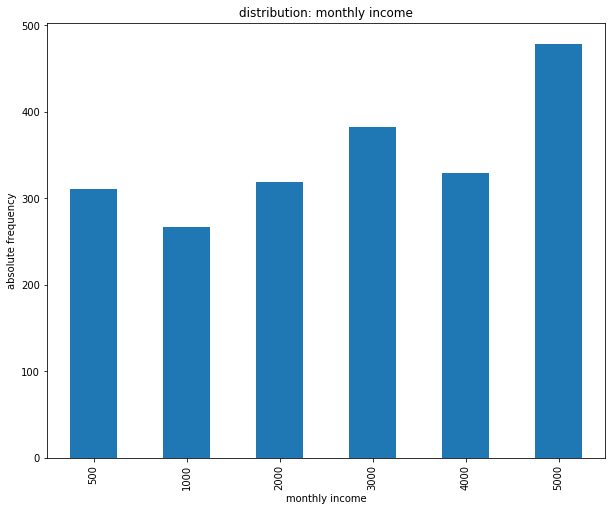

In [42]:
money_intervals = [500, 1000, 2000, 3000, 4000, 5000]

show_frequencies("monthlyIncome", "monthly income", money_intervals)

There seem to be a overrepresentation of good money earning.

In [33]:
negative_feats = ["insolvencyProceedings", "executionProceedings", "admonition", "cashing"]
quest["negatives"] = np.any(quest[negative_feats], axis=1)

/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Relative Häufigkeit von: Negative Merkmale
False    0.90643
True     0.09357
Name: negatives, dtype: float64


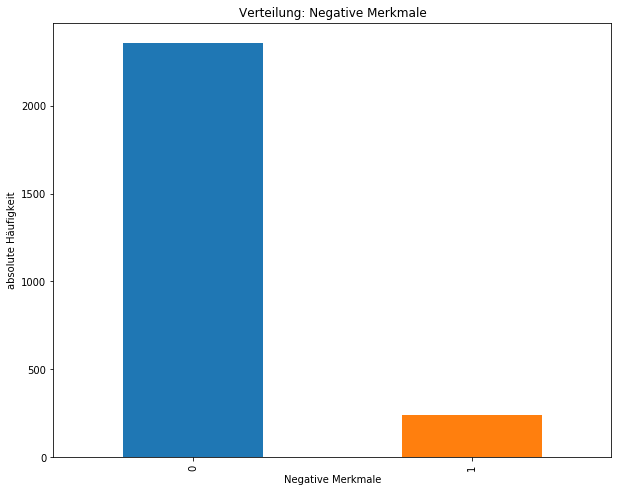

In [34]:
show_frequencies("negatives", "Negative Merkmale", [0, 1])

Relative Häufigkeit von: aktueller Kredit
5000.0    0.244128
500.0     0.016558
4000.0    0.010012
2000.0    0.008856
3000.0    0.008086
1000.0    0.006546
Name: activeLoanAmount, dtype: float64


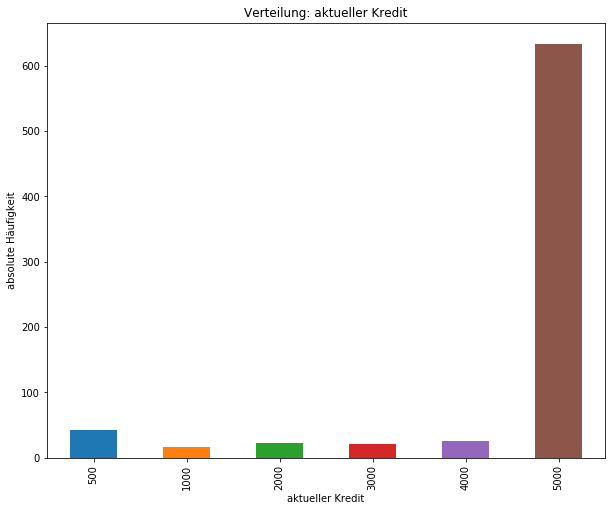

In [35]:
show_frequencies("activeLoanAmount", "aktueller Kredit", money_intervals)

Relative Häufigkeit von: Bezahlter Kredit
5000.0    0.178668
500.0     0.030420
1000.0    0.020023
4000.0    0.017713
2000.0    0.013477
3000.0    0.009241
Name: paidOffLoanAmount, dtype: float64


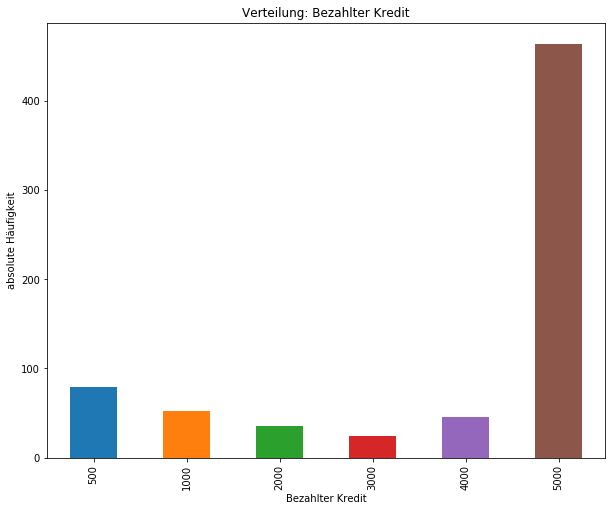

In [36]:
show_frequencies("paidOffLoanAmount", "Bezahlter Kredit", money_intervals)

We are going to concentrate on monthly Income.

### Distribution of financial data in social groups
We now compare the distribution of monthly Income along the identified dimensions

In [43]:
def group_plot(feat1, feat2, df, method):
    
    chars = [c for c in df[feat1].unique() if type(c) == str or not np.isnan(c)]
    
    # ugly & hard coded
    if feat1 == "generation_groups":
        chars.remove(1)
        chars = sorted(chars)
    
    fig, axes = plt.subplots(nrows=1, ncols=len(chars), figsize=(20,8))

    for i,v in enumerate(chars):
        if type(v) != str and np.isnan(v):
            continue
        if method=="bar":
            df.groupby(feat1)[feat2].value_counts().unstack().fillna(0).stack().loc[v].plot(method, ax=axes[i])
            y_lab = "Häufigkeit"
        elif method=="box":
            df.groupby(feat1)[feat2].get_group(v).plot(method, ax=axes[i])
            y_lab = "Ausprägung"
        axes[i].title.set_text(v)
        axes[i].set_ylabel(y_lab)


In [61]:
import seaborn as sns

def mbar_plot(col1, col2, name1, name2, chars, attr=None, rel=False):
    if rel:
        ax = quest.groupby(col1)[col2].value_counts().unstack().fillna(0).div(quest[col1].value_counts(), axis=0).reindex(chars).plot(kind="bar", figsize=(10,8))
        ax.set_ylabel("relative frequency")
    else:
        ax = quest.groupby(col1)[col2].value_counts().unstack().fillna(0).reindex(chars).plot(kind="bar", figsize=(10,8))
        ax.set_ylabel("absolute frequency")
    ax.set_xlabel(name)
    ax.set_title("%s per %s"%(name2, name1))
    if attr is not None:
        ax.set_xticklabels(attr)

        
def mbox_plot(col1, col2, name, chars, attr=None):
    plt.figure(figsize=(10, 8))
    ax = sns.boxplot(x=col1, y=col2, data=quest, color="skyblue", order=chars)
    ax.set_title("monthly income per %s"%name)
    ax.grid(False)
    ax.set_xlabel(name)
    ax.set_ylabel("monthly income")
    if attr is not None:
        ax.set_xticklabels(attr)    
    plt.suptitle("")

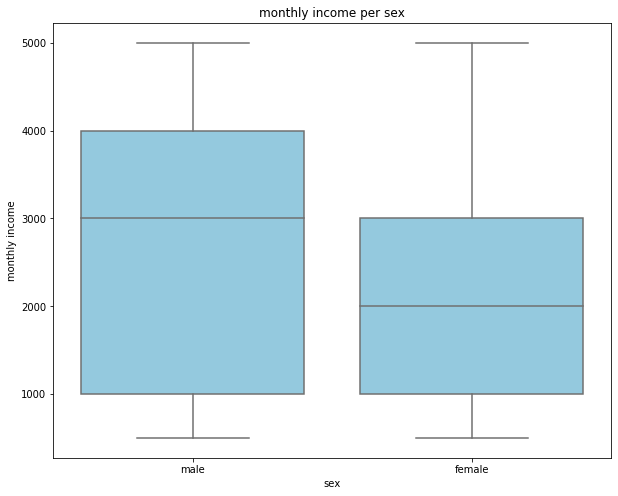

In [62]:
mbox_plot("sex", "monthlyIncome", "sex", sex_chars, sex_attr)

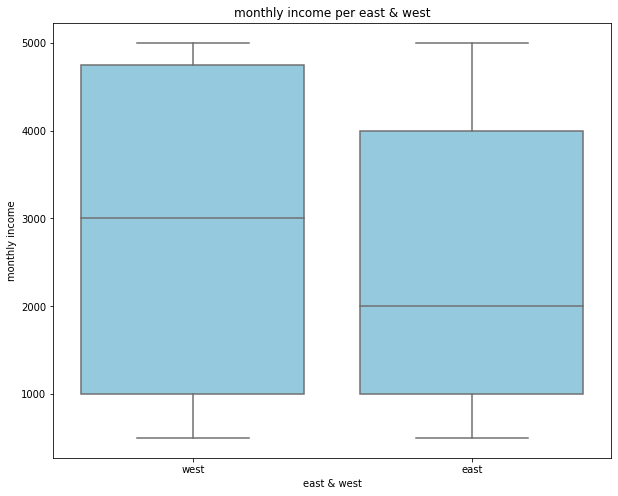

In [63]:
mbox_plot("east_west", "monthlyIncome", "east & west", east_west_chars, east_west_attr)

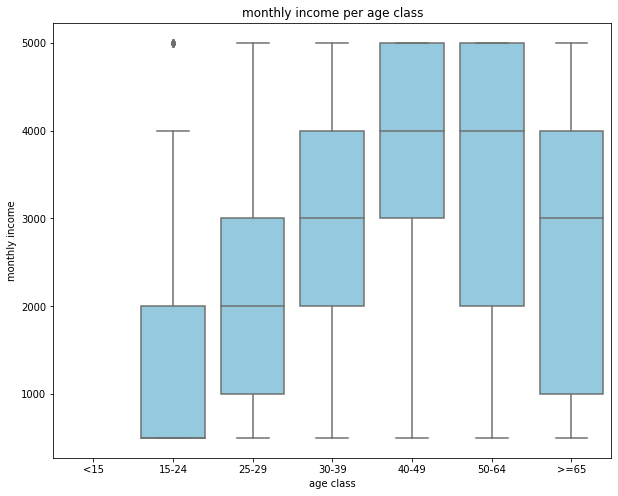

In [49]:
mbox_plot("age_class", "monthlyIncome", "age class", age_class_chars)

In [50]:
df_temp = pd.DataFrame([quest.monthlyIncome, quest.age]).T.dropna()

Text(0, 0.5, 'Monatliches Einkommen')

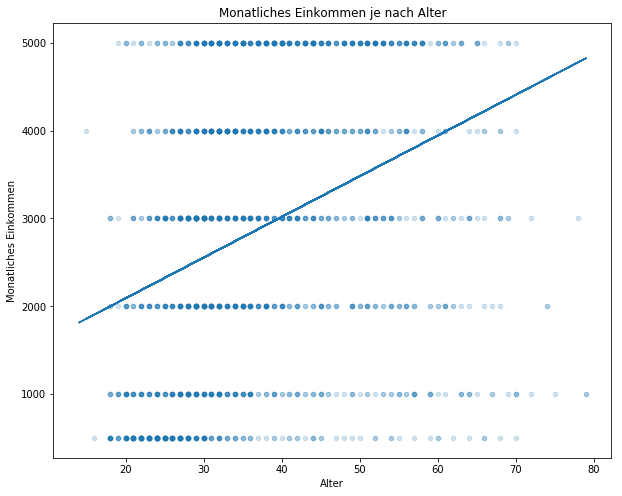

In [43]:
b, m = np.polynomial.polynomial.polyfit(df_temp.age.dropna().values, df_temp.monthlyIncome.dropna().values, 1)

ax = quest.plot(kind="scatter", x="age", y="monthlyIncome", figsize=(10, 8), alpha=.2)
ax.plot(quest.age.values, b + m * quest.age.values, '-')

ax.set_title("Monatliches Einkommen je nach %s"%"Alter")
ax.grid(False)
ax.set_xlabel("Alter")
ax.set_ylabel("Monatliches Einkommen")

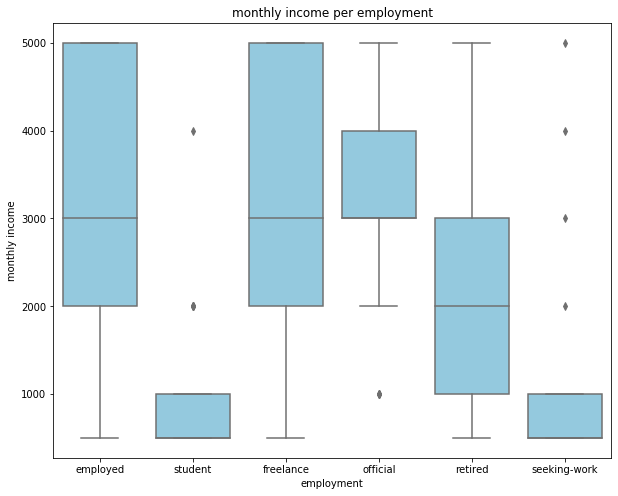

In [51]:
mbox_plot("employment", "monthlyIncome", "employment", employment_chars, employment_attr)

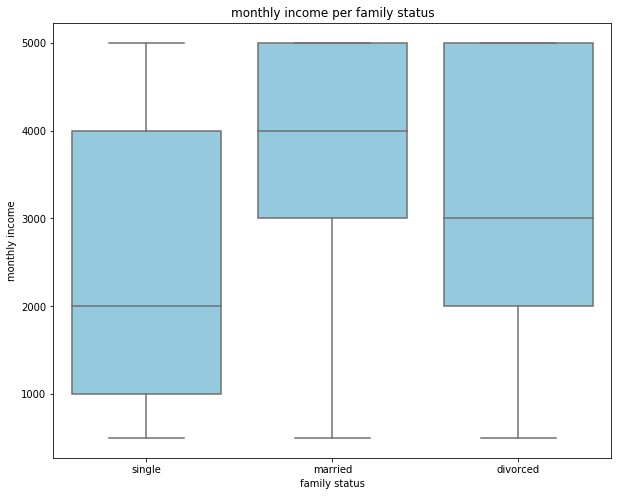

In [52]:
mbox_plot("familyStatus", "monthlyIncome", "family status", familyStatus_chars, familyStatus_attr)

In [54]:
# Looking further at east - west

federal_map = federal_map.join(federal_data.set_index("plz_one")["east_west"], on="plz", rsuffix="_count")

#federal_map[federal_map["east_west"]=="east"] = federal_data[federal_data["east_west"]=="east"]["monthlyIncome"].median()
#federal_map[federal_map["east_west"]=="west"] = federal_data[federal_data["east_west"]=="west"]["monthlyIncome"].median()

print("Sample size of east:", federal_data[federal_data["east_west"]=="east"].shape[0])
print("Sample size of west:", federal_data[federal_data["east_west"]=="west"].shape[0])
print("Median income of east:", federal_data[federal_data["east_west"]=="east"]["monthlyIncome"].median())
print("Median income of west:", federal_data[federal_data["east_west"]=="west"]["monthlyIncome"].median())
print("Median age (generation) of east:", federal_data[federal_data["east_west"]=="east"]["age_gen"].median())
print("Median age (generation) of west:", federal_data[federal_data["east_west"]=="west"]["age_gen"].median())


Sample size of east: 543
Sample size of west: 1996
Median income of east: 2000.0
Median income of west: 3000.0
Median age (generation) of east: 2.0
Median age (generation) of west: 2.0


The median shows a somewhat expected distribution: East-Germany < North-Germany < South-Germany.

## Dependence between social dimensions
Because employment and family status are determining dimensions, we also look at disparities in the other social goup distributions.

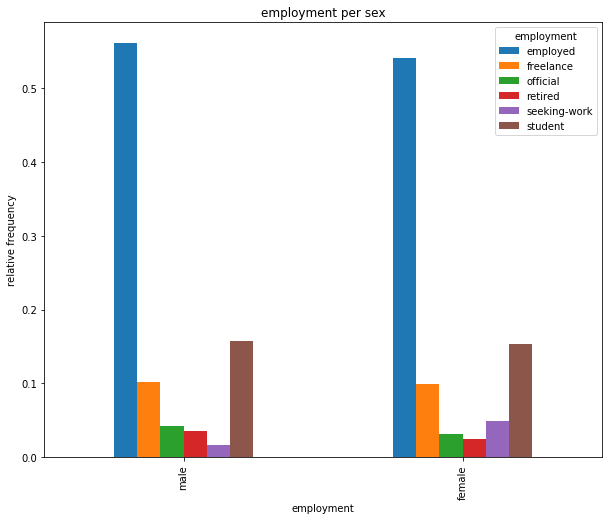

In [65]:
mbar_plot("sex", "employment", "sex", "employment", sex_chars, sex_attr, rel=True)

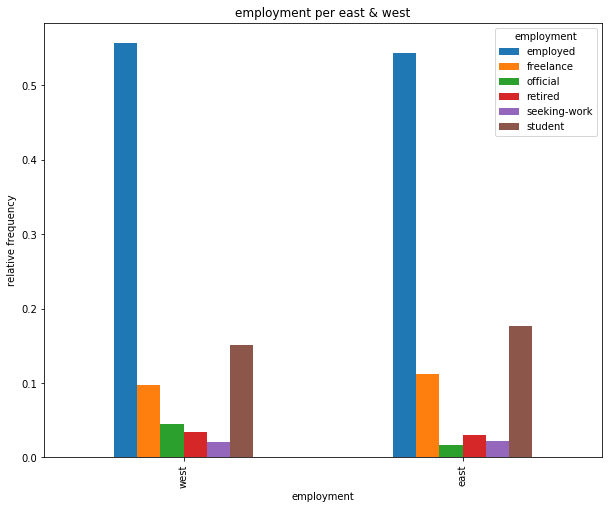

In [66]:
mbar_plot("east_west", "employment", "east & west", "employment", east_west_chars, east_west_attr, rel=True)

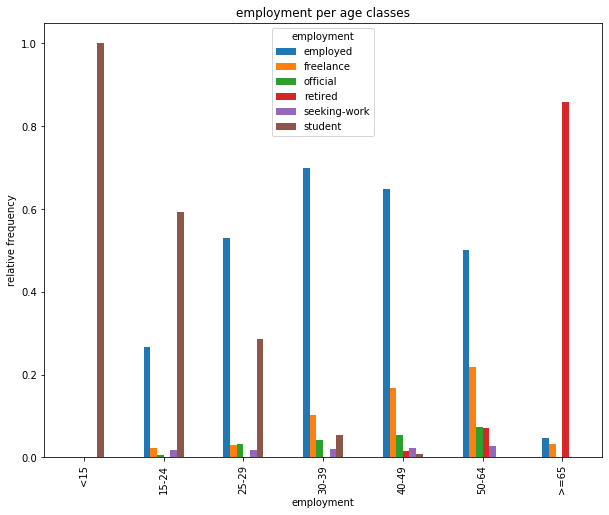

In [67]:
mbar_plot("age_class", "employment", "age classes", "employment", age_class_chars, rel=True)

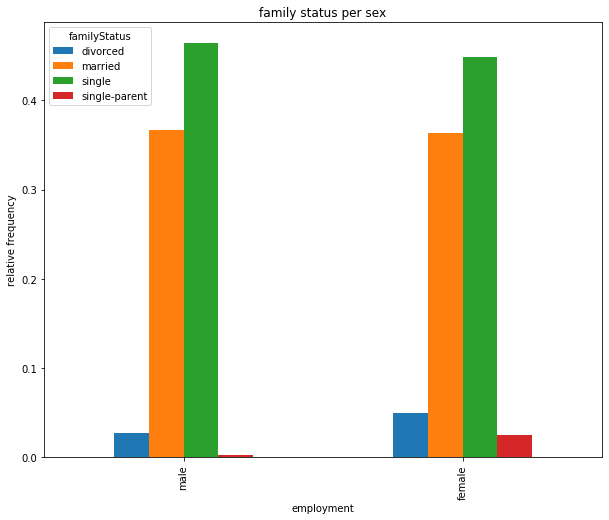

In [70]:
mbar_plot("sex", "familyStatus", "sex", "family status", sex_chars, sex_attr, rel=True)

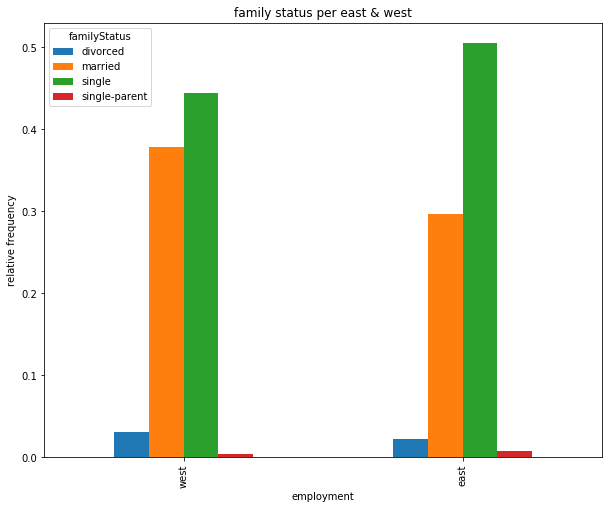

In [69]:
mbar_plot("east_west", "familyStatus", "east & west", "family status", east_west_chars, east_west_attr, rel=True)

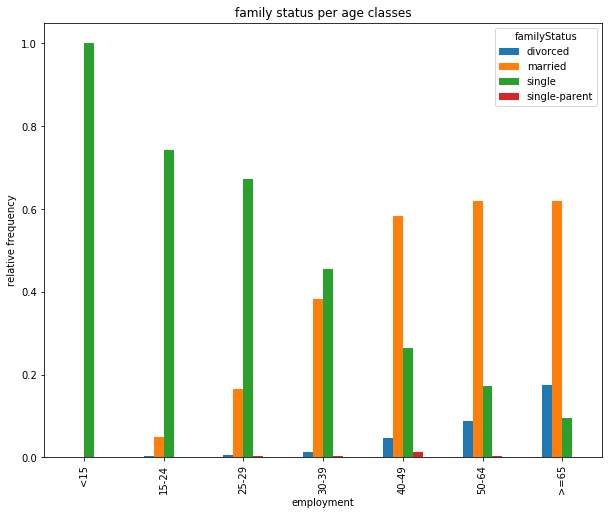

In [72]:
mbar_plot("age_class", "familyStatus", "age classes", "family status", age_class_chars, rel=True)

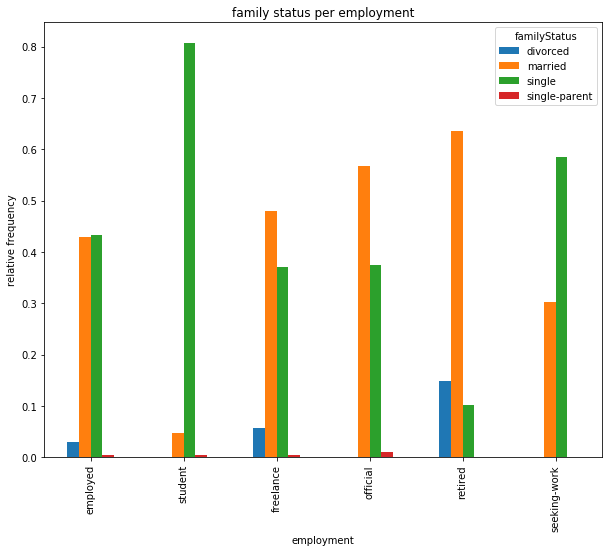

In [73]:
mbar_plot("employment", "familyStatus", "employment", "family status", employment_chars, rel=True)

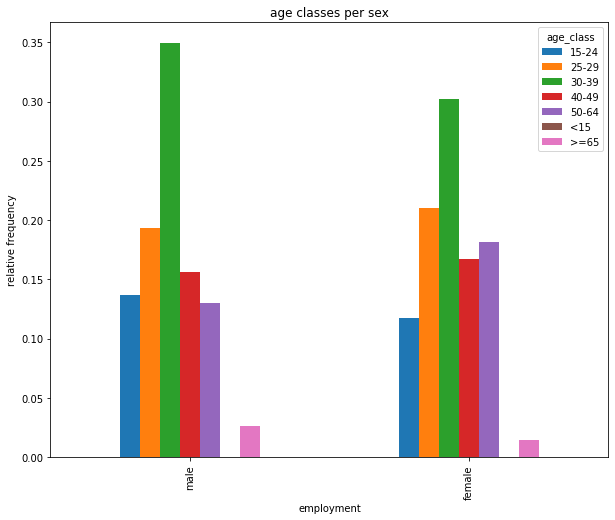

In [74]:
mbar_plot("sex", "age_class", "sex", "age classes", sex_chars, sex_attr, rel=True)

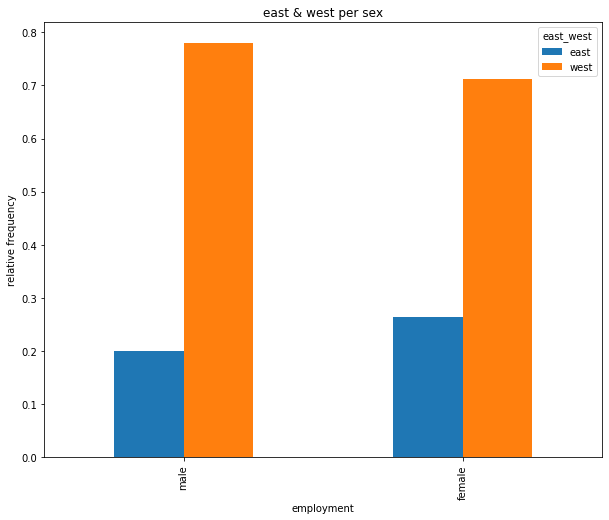

In [75]:
mbar_plot("sex", "east_west", "sex", "east & west", sex_chars, sex_attr, rel=True)

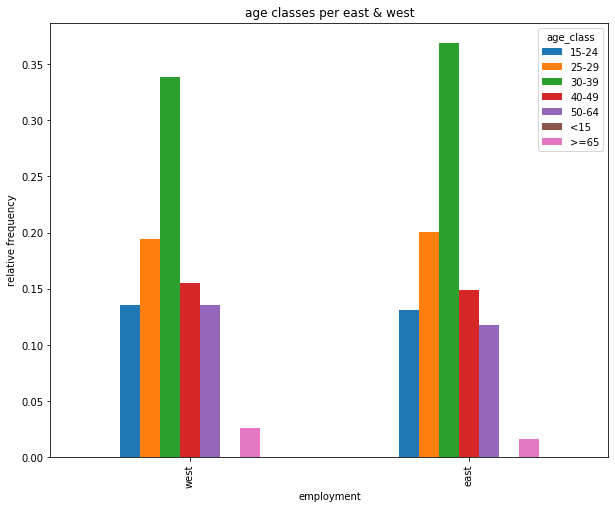

In [76]:
mbar_plot("east_west", "age_class", "east & west", "age classes", east_west_chars, east_west_attr, rel=True)

Also east/west categories have similar distributions in age. 


Dependence of social groups and income:
- married/devorced, employee/freelance, generation groups 3/4 have similar distributions with median = 4000
- single/single-parent, student/seeking-work, generation group 2 have similar distributions with median = 2000
- in middle between those extreme groups we have retired(worse than employee)/official(better than employee)
- Male has higher median = 3000, female median=2000, also 75%=3000, in male its 4000
- east-median=2000, west=3000, everything else is same (quantile-25%/-75%)

Dependence between social groups: 
- There is a dependence in single, student, age
- employed/freelance, married or single equally distributed, age(3,4)/age(2,3)

Assumption: age is mediating most differences in income between employment-groups (employee/freelance/official, student) as well as in familyStatus (single, married). There is also a shift in single (familyStatus), because many singles are also students and are also of young age in the dataset. We need to consider this skew. Age should not be causaly leading to less income - we just have much more students in the lower age class. So its the interdependence of employment and age.  
But there are similar distributions of age in east/west and sex groups which have also differences in income.

We conclude: Age and employment seem to be important dimensions for differences in income, but there is also sex and the regional differences, independent of age that are different in income.

## Hypothesis Testing - Difference in groups

In [58]:
quest[["monthlyIncome", "age"]].corr("spearman").style.applymap(_color_map)

,monthlyIncome,age
monthlyIncome,1,0.419938
age,0.419938,1


In [59]:
# Chi2 - cramers V - only for monthlyIncome

df_ch2_stats = hstats.get_cramersv(quest[["sex", "east_west", "employment", "familyStatus"]], 
                                   quest["monthlyIncome"], "monthlyIncome")
df_ch2_stats.style.apply(hstats.highlight_unindependent)

,X2-test,p-value,V-test
sex,71.074,2.74925e-11,0.131216
east_west,45.5429,1.12516e-08,0.149014
employment,1441.45,5.35682e-289,0.37346
familyStatus,327.652,9.77261e-61,0.241865


### Summary of Correlations
For a descriptive analysis of the correlations we assume between different dimensions we use scatter plots, correlation coefficients and for a inferential view hypothesis tests to back up our assumptions.

- Social categories
    - Looking at the tendency of the regression line, we can see a positive correlation in age
    - The numberOfChildren has also a positive correlation. In social inequality studies, the number of children is a very likely indicator for earning less money. So this might be due to a skew of good money earning family-members, indicating a underrepresentation of less-earning families.
    - Considering relocations, the regression line has a negative slope.
- Financial categories
    - There is a positive correlation with the loan-variables as well as giroaccounts, creditcards, mobileContracts

The yearOfBirth shows a negative correlation to all positive correlated dimensions to monthlyIncome, only the variable negativly correlated to monthlyIncome is positivly correlated to age.

### Difference in groups
Because or main hypothesis depends on the income, we more closely look at the income. We also exclude persons with the characteristics that are highly underrepresented and therefore need to be ignored.

We assume the monthlyIncome to be categorical and see if the distributions are different.  

## Conclusion
There seem to be differences in income between all dimensions assumed. 

For further analysis we assume the following social dimensions to be important for the score:
- East-/Westgermany
- Sex
- Age

Dimensions that might be socially interessting when analysing the dependency of score and social dimensions:
- Employment
- Family Status
- number of Children

Financial dimensions that might be important for the score
- negative features (insolvency proceedings, execution proceedings, admonition, cashing)
- loan-variables
- credit cards, giro accounts (less important, seems to be correlated to credit cards)

Further dimension that might be important:
- relocation

We are going to exclude the following categories:
- sex: non-binary
- age: <18, >65
- family status: single-parent, divorced
- employment: seeking-work, retired

Also we need to consider undersampling for the following characteristics:
- sex: male
- age: 30-39 J.